In [65]:
import pandas as pd

data = pd.read_csv("/content/sample_data/Project_data.csv")

In [66]:
data

,age,gender,time_spent,platform,interests,location,demographics,profession,income,indebt,isHomeOwner,Owns_Car
0,56,male,3,Instagram,Sports,United Kingdom,Urban,Software Engineer,19774,True,False,False
1,46,female,2,Facebook,Travel,United Kingdom,Urban,Student,10564,True,True,True
2,32,male,8,Instagram,Sports,Australia,Sub_Urban,Marketer Manager,13258,False,False,False
3,60,non-binary,5,Instagram,Travel,United Kingdom,Urban,Student,12500,False,True,False
4,25,male,1,Instagram,Lifestlye,Australia,Urban,Software Engineer,14566,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...
995,22,female,8,Instagram,Lifestlye,United Kingdom,Rural,Marketer Manager,18536,False,True,False
996,40,non-binary,6,YouTube,Travel,United Kingdom,Rural,Software Engineer,12711,True,False,False
997,27,non-binary,5,YouTube,Travel,United Kingdom,Rural,Student,17595,True,False,True
998,61,female,4,YouTube,Sports,Australia,Sub_Urban,Marketer Manager,16273,True,True,False


In [67]:
data['income'].max()

19980

In [68]:
data['income'].nunique()

955

In [69]:
data['income'].value_counts()

,count
income,
15988,3
19609,3
16985,2
15073,2
13083,2
13845,2
14133,2
18989,2
10969,2


In [ ]:
counts= data['income'].value_counts()
filtered_counts = counts[counts > 1]
print(filtered_counts)

income
15988    3
19609    3
16985    2
15073    2
13083    2
13845    2
14133    2
18989    2
10969    2
19903    2
15424    2
15993    2
18880    2
11164    2
11030    2
12722    2
12073    2
17734    2
11777    2
12251    2
17169    2
13981    2
19493    2
13454    2
11325    2
12892    2
15192    2
11823    2
10564    2
14920    2
15560    2
17314    2
10947    2
12513    2
15057    2
19244    2
14326    2
10754    2
14868    2
11129    2
18719    2
10555    2
16906    2
Name: count, dtype: int64


In [70]:
# Define numerical and categorical features
numerical_features = ['age', 'time_spent', 'income']
categorical_features = ['gender', 'platform', 'interests', 'location', 'demographics', 'profession', 'indebt', 'isHomeOwner', 'Owns_Car']


In [71]:
categorical_features

['gender',
 'platform',
 'interests',
 'location',
 'demographics',
 'profession',
 'indebt',
 'isHomeOwner',
 'Owns_Car']

In [51]:
#features for one hot encoding as these are not ordinal in nature. - Issue with One Hot Encoding was that it created around 1023 features making cluster analysis difficult to interpret.

#One Hot Encoded features - gender, platform, interests, location, profession, indebt, isHomeOwner, Owns_Car

# from sklearn.preprocessing import OneHotEncoder

# encoder = OneHotEncoder(sparse=False, drop='first')
# encode_data = encoder.fit_transform(data)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [52]:
# encoded_df = pd.DataFrame(encode_data, columns=encoder.get_feature_names_out())

In [73]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
label_encoder = LabelEncoder()
encode_data = data[numerical_features] #directly saving the features with numerical values (without encoding) in the encoded_data dataframe

In [53]:
# encode_data = pd.DataFrame()
# encoded_df.head()
# encode_data = data[numerical_features] + encode_categorical_data

,age_19,age_20,age_21,age_22,age_23,age_24,age_25,age_26,age_27,age_28,...,income_19945,income_19951,income_19952,income_19957,income_19965,income_19969,income_19980,indebt_True,isHomeOwner_True,Owns_Car_True
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [ ]:
scaler = StandardScaler()

scaled_numerical_features = scaler.fit_transform(data[numerical_features])

In [76]:
mappings = {}
# encode_data = pd.DataFrame()
# Encode each column and store the mapping
for column in categorical_features:
    # Fit and transform the column
    encode_data[column] = label_encoder.fit_transform(data[column])

    # Store the mapping from original to encoded values
    mappings[column] = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))

# Display the mappings
for column, mapping in mappings.items():
    print(f"\n{column} Mapping:")
    for original, encoded in mapping.items():
        print(f"{original}: {encoded}")


gender Mapping:
female: 0
male: 1
non-binary: 2

platform Mapping:
Facebook: 0
Instagram: 1
YouTube: 2

interests Mapping:
Lifestlye: 0
Sports: 1
Travel: 2

location Mapping:
Australia: 0
United Kingdom: 1
United States: 2

demographics Mapping:
Rural: 0
Sub_Urban: 1
Urban: 2

profession Mapping:
Marketer Manager: 0
Software Engineer: 1
Student: 2

indebt Mapping:
False: 0
True: 1

isHomeOwner Mapping:
False: 0
True: 1

Owns_Car Mapping:
False: 0
True: 1


In [77]:
encode_data.head() #displaying the encoded data

,age,time_spent,income,gender,platform,interests,location,demographics,profession,indebt,isHomeOwner,Owns_Car
0,56,3,19774,1,1,1,1,2,1,1,0,0
1,46,2,10564,0,0,2,1,2,2,1,1,1
2,32,8,13258,1,1,1,0,1,0,0,0,0
3,60,5,12500,2,1,2,1,2,2,0,1,0
4,25,1,14566,1,1,0,0,2,1,0,1,1


In [ ]:
scaled_features = scaler.fit_transform(encode_data)
scaled_numerical_df = pd.DataFrame(scaled_features, columns=['Age_Scaled','Time_spent_Scaled', 'Income_Scaled'])


In [ ]:
scaled_numerical_df = pd.DataFrame(scaled_features, columns=['Age_Scaled','Time_spent_Scaled', 'Income_Scaled', 'Gender_scaled', 'Platform_scaled', 'Interests_scaled', 'Location_scaled', 'Demographics_scaled',
                                                             'Profession_scaled', 'Indebt_scaled', 'IsHomeOwner_scaled', 'Owns_Car_scaled'])


In [ ]:
scaled_numerical_df

,Age_Scaled,Time_spent_Scaled,Income_Scaled,Gender_scaled,Platform_scaled,Interests_scaled,Location_scaled,Demographics_scaled,Profession_scaled,Indebt_scaled,IsHomeOwner_scaled,Owns_Car_scaled
0,1.112882,-0.799901,1.609380,-0.001228,-0.028830,0.015896,0.040319,1.244883,0.056541,1.006018,-1.016130,-1.081294
1,0.371652,-1.194135,-1.505106,-1.229356,-1.282290,1.238658,0.040319,1.244883,1.285703,1.006018,0.984126,0.924818
2,-0.666069,1.171269,-0.594094,-0.001228,-0.028830,0.015896,-1.181457,0.018397,-1.172620,-0.994018,-1.016130,-1.081294
3,1.409373,-0.011433,-0.850422,1.226900,-0.028830,1.238658,0.040319,1.244883,1.285703,-0.994018,0.984126,-1.081294
4,-1.184929,-1.588369,-0.151776,-0.001228,-0.028830,-1.206866,-1.181457,1.244883,0.056541,-0.994018,0.984126,0.924818
...,...,...,...,...,...,...,...,...,...,...,...,...
995,-1.407298,1.171269,1.190734,-1.229356,-0.028830,-1.206866,0.040319,-1.208089,-1.172620,-0.994018,0.984126,-1.081294
996,-0.073085,0.382801,-0.779069,1.226900,1.224631,1.238658,0.040319,-1.208089,0.056541,1.006018,-1.016130,-1.081294
997,-1.036683,-0.011433,0.872522,1.226900,1.224631,1.238658,0.040319,-1.208089,1.285703,1.006018,-1.016130,0.924818
998,1.483496,-0.405667,0.425470,-1.229356,1.224631,0.015896,-1.181457,0.018397,-1.172620,1.006018,0.984126,-1.081294


In [78]:
import seaborn as sns #for generating heatmap
import matplotlib.pyplot as plt

correlation_matrix = encode_data.corr() # generating the corrleation matrix for all the encoded features

print(correlation_matrix)

                   age  time_spent    income    gender  platform  interests  \
age           1.000000   -0.033827 -0.087391 -0.014291  0.011086  -0.013249   
time_spent   -0.033827    1.000000  0.004757 -0.017928 -0.029979  -0.008495   
income       -0.087391    0.004757  1.000000 -0.033675 -0.007061  -0.022495   
gender       -0.014291   -0.017928 -0.033675  1.000000 -0.018508   0.030054   
platform      0.011086   -0.029979 -0.007061 -0.018508  1.000000   0.001991   
interests    -0.013249   -0.008495 -0.022495  0.030054  0.001991   1.000000   
location      0.027942   -0.045297 -0.020917 -0.007453 -0.006495  -0.033508   
demographics  0.018436   -0.036537  0.047230 -0.001484 -0.008694   0.008706   
profession    0.040394   -0.010014  0.045136 -0.040689 -0.015318  -0.003905   
indebt       -0.017055    0.013079  0.037860 -0.013502  0.008947   0.008464   
isHomeOwner  -0.005321    0.029388  0.006072 -0.006161  0.043415  -0.018089   
Owns_Car      0.006921   -0.020271  0.019789 -0.0506

In [79]:
from sklearn.cluster import KMeans


In [80]:
# Elbow method to determine the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(encode_data)
    wcss.append(kmeans.inertia_)

print(wcss)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

[8744920624.911, 2190691073.429185, 883616033.3918674, 514030674.20447844, 321723945.51625884, 223700993.53153387, 168994684.80130133, 125637573.77436954, 101330239.48796333, 82838980.40968956]


Elbow Method:

Elbow Graph Interpretation: The elbow method involves plotting the sum of squared distances (inertia) from each point to its assigned cluster center against the number of clusters (n_clusters). You look for the "elbow" point where adding more clusters doesn’t significantly decrease inertia, indicating the optimal number of clusters.


**Our Finding**: We observed an elbow between the value 3 and 4, suggesting that the reasonable number of clusters for our data could be either 3 or 4.

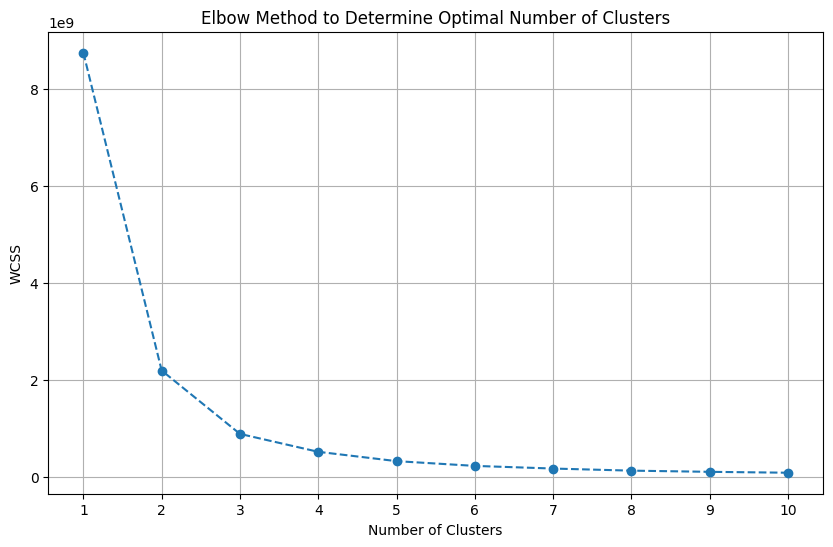

In [81]:
# Plot the Elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method to Determine Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

In [82]:
# 2. Perform K-Means Clustering with 3 Clusters
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(encode_data)

# Associate clusters with data
encode_data['cluster'] = clusters





/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [83]:
# # 3. Analyze Differences Between Clusters
cluster_analysis = encode_data.groupby('cluster').mean()
print(cluster_analysis)

               age  time_spent        income    gender  platform  interests  \
cluster                                                                       
0        39.859195    4.908046  18397.752874  0.962644  1.014368   0.962644   
1        40.966565    5.167173  14833.927052  1.000000  1.027356   1.012158   
2        42.219814    5.018576  11554.312693  1.043344  1.027864   0.987616   

         location  demographics  profession    indebt  isHomeOwner  Owns_Car  
cluster                                                                       
0        0.977011      1.043103    0.997126  0.525862     0.517241  0.543103  
1        0.927052      0.969605    0.978723  0.489362     0.498480  0.550152  
2        0.996904      0.938080    0.882353  0.473684     0.507740  0.523220  


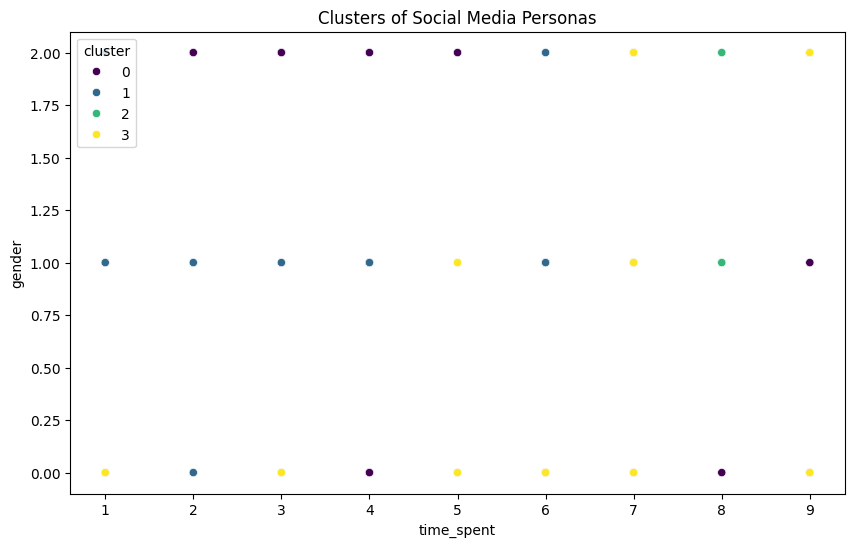

In [93]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='time_spent', y='gender', hue='cluster', data=encode_data, palette='viridis')
plt.title('Clusters of Social Media Personas')
plt.show()

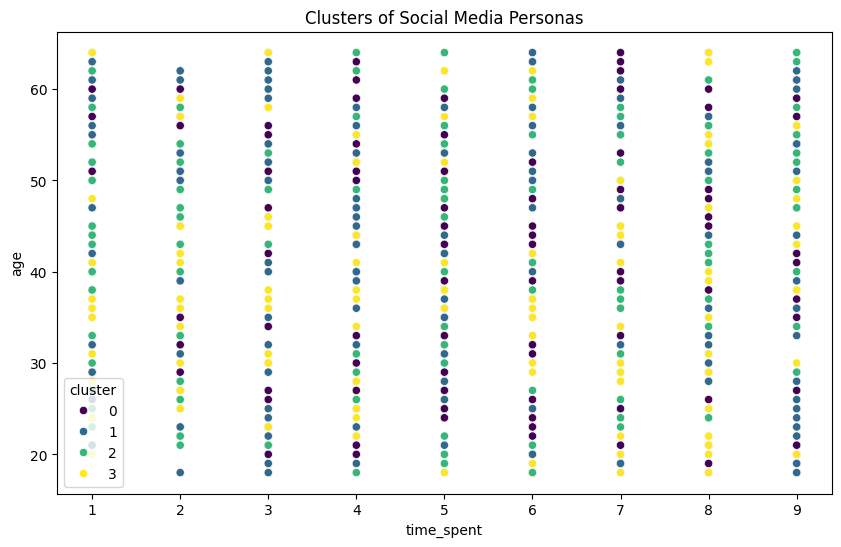

In [94]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='time_spent', y='age', hue='cluster', data=encode_data, palette='viridis')
plt.title('Clusters of Social Media Personas')
plt.show()

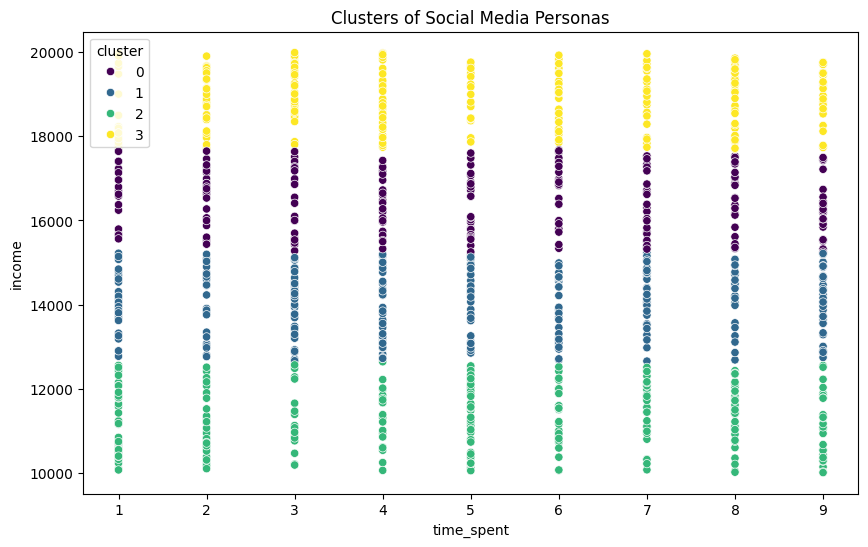

In [95]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='time_spent', y='income', hue='cluster', data=encode_data, palette='viridis')
plt.title('Clusters of Social Media Personas')
plt.show()

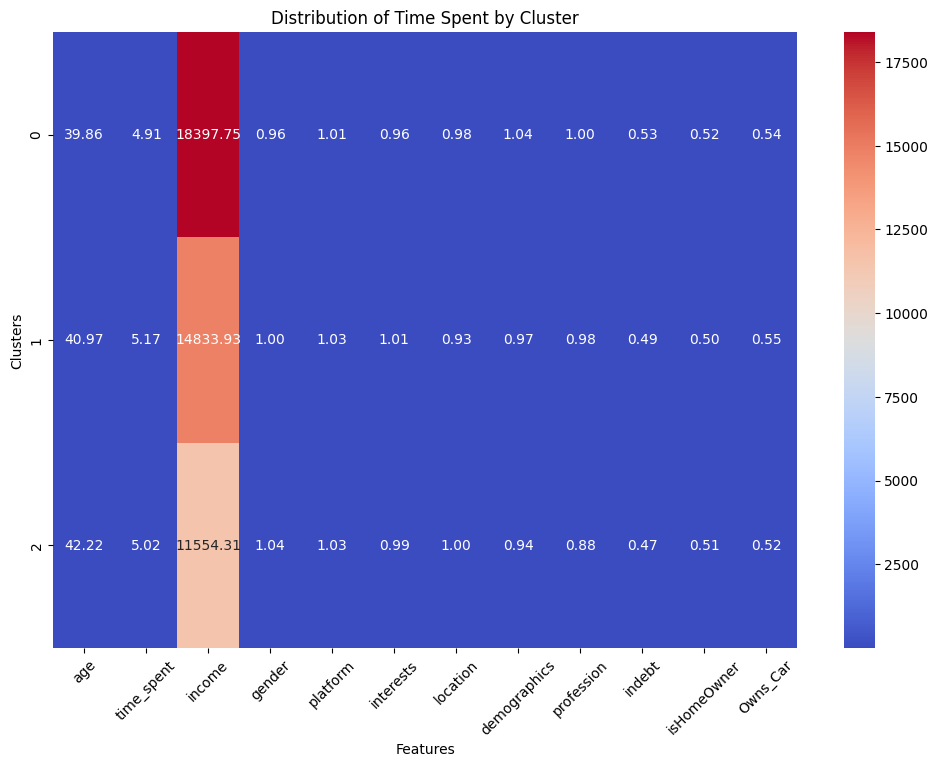

In [85]:
# Visualize the distribution of key features across clusters
plt.figure(figsize=(12, 8))
sns.heatmap(cluster_analysis, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Distribution of Time Spent by Cluster')
plt.xlabel('Features')
plt.ylabel('Clusters')
plt.xticks(rotation=45)
plt.show()

In [86]:
print(encode_data['cluster'].value_counts())

cluster
0    348
1    329
2    323
Name: count, dtype: int64


**Doing the cluster analysis for 4 clusters as the elbow point lied between 3 and 4**





In [87]:
# 2. Perform K-Means Clustering with 4 Clusters
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(encode_data)

# Associate clusters with data
encode_data['cluster'] = clusters


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [88]:
# # 3. Analyze Differences Between 4 Clusters
cluster_analysis = encode_data.groupby('cluster').mean()
print(cluster_analysis)

               age  time_spent        income    gender  platform  interests  \
cluster                                                                       
0        40.943396    5.042453  16461.330189  1.033019  0.981132   1.028302   
1        41.638060    5.011194  14010.533582  0.996269  1.011194   0.958955   
2        42.062963    5.018519  11284.796296  1.029630  1.044444   1.011111   
3        39.160000    5.048000  18893.212000  0.948000  1.048000   0.956000   

         location  demographics  profession    indebt  isHomeOwner  Owns_Car  
cluster                                                                       
0        0.811321      0.990566    1.004717  0.514151     0.504717  0.561321  
1        0.985075      1.026119    0.977612  0.462687     0.485075  0.511194  
2        1.022222      0.907407    0.874074  0.485185     0.522222  0.529630  
3        1.020000      1.020000    0.972000  0.532000     0.520000  0.560000  


Clustering Analysis
The clustering output gives us an average (centroid) for each feature within the clusters. Here are the variables and what they might represent in the context of social media users:

age: Average age of users in each cluster.

time_spent: Average time spent on social media by users in each cluster.

income: Average income of users in each cluster.

encode_gender: Encoded gender values (e.g., 0 for male, 1 for female, etc.).

encode_platform: Encoded platform preference (e.g., Facebook, Instagram, etc.).

encode_interests: Encoded interests or hobbies.

encode_location: Encoded geographic location.

encode_demographics: Encoded demographic information.

encode_profession: Encoded profession categories.

encode_indebt: Encoded financial status or debt situation.

encode_isHomeOwner: Encoded home ownership status.

encode_Owns_Car: Encoded car ownership status.

In [ ]:
encode_data

,age,time_spent,income,gender,platform,interests,location,demographics,profession,indebt,isHomeOwner,owns_Car,cluster
0,56,3,19774,1,1,1,1,2,1,1,0,0,3
1,46,2,10564,0,0,2,1,2,2,1,1,1,2
2,32,8,13258,1,1,1,0,1,0,0,0,0,1
3,60,5,12500,2,1,2,1,2,2,0,1,0,2
4,25,1,14566,1,1,0,0,2,1,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,22,8,18536,0,1,0,1,0,0,0,1,0,3
996,40,6,12711,2,2,2,1,0,1,1,0,0,1
997,27,5,17595,2,2,2,1,0,2,1,0,1,0
998,61,4,16273,0,2,1,0,1,0,1,1,0,0


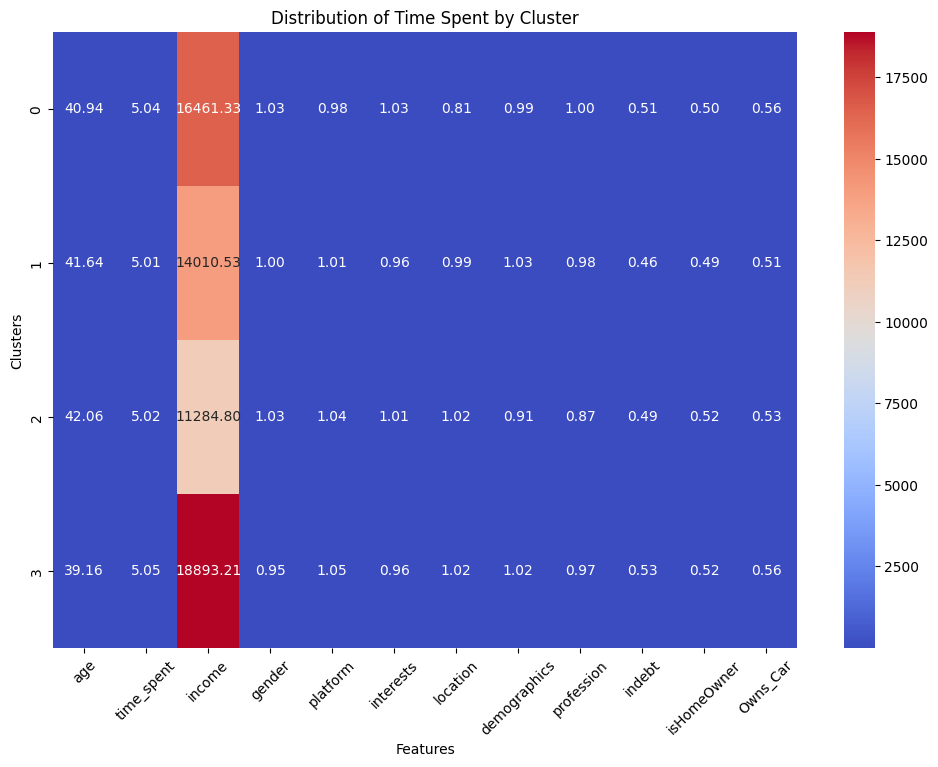

In [89]:
# Visualize the distribution of key features across clusters
plt.figure(figsize=(12, 8))
sns.heatmap(cluster_analysis, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Distribution of Time Spent by Cluster')
plt.xlabel('Features')
plt.ylabel('Clusters')
plt.xticks(rotation=45)
plt.show()





**CLUSTER ANALYSIS AND INSIGHTS (Code in the 2 above cells)**

**CLUSTER 0**

*Demographics:*

*Age:* Average age is around 42.16.
Income: Lower income level at approximately $11,559.
Gender: Slightly more towards female (encoded value close to 1.0).
Behavior:

*Time Spent:* Moderate time spent on social media (5.01 units).
Platform Preference: Tends to prefer platforms encoded higher, indicating platforms like Facebook or Instagram (encoded value of 1.03).
Socioeconomic Status:

Debt and Ownership: Moderate debt level, slightly lower homeownership, and car ownership.
Profession: Less professional or possibly entry-level positions (encoded value of 0.88).
Insights:

Cluster 0 represents middle-aged users with lower income and moderate social media usage. They might be on social media platforms primarily for social connections or leisure.
These users are slightly more likely to be female and might not be heavily engaged in professional roles.




**CLUSTER1**

Demographics:

Age: Average age is around 41.04.
Income: Medium income level at approximately $14,855.
Gender: Balanced gender distribution (encoded value close to 0.99).
Behavior:

Time Spent: Highest time spent on social media (5.16 units).
Platform Preference: Prefers platforms with an encoded value of 1.02.
Socioeconomic Status:

Debt and Ownership: Balanced debt levels, lower homeownership, and moderate car ownership.
Profession: Moderately professional roles (encoded value of 0.98).
Insights:



Cluster 1 is characterized by users with average age and income, and they spend the most time on social media. These users are potentially the most engaged, using social media for both personal and professional networking.
They exhibit balanced gender distribution and tend to occupy professional roles more than Cluster 0.



**CLUSTER 2**

Demographics:

Age: Average age is around 39.83.
Income: Highest income level at approximately $18,413.
Gender: Slightly more male (encoded value of 0.96).
Behavior:

Time Spent: Lowest time spent on social media (4.92 units).
Platform Preference: Slightly less preference for the popular platforms (encoded value of 1.01).
Socioeconomic Status:

Debt and Ownership: Highest debt level, higher homeownership, and car ownership.
Profession: Most professional roles (encoded value of 1.0).
Insights:




Cluster 2 represents younger, higher-income users who spend less time on social media. These users are likely more professionally focused and use social media strategically rather than for leisure.
They tend to own homes and cars and are slightly more likely to be male, possibly indicating a more settled lifestyle.
General Insights and Recommendations
Cluster Characteristics:



Cluster 0 users might be targeted for leisure and social connection features on platforms.


Cluster 1 users could be the focus of features aimed at high engagement and interactive content.


Cluster 2 users may benefit from features that integrate professional networking and time management tools.



*Marketing and Development:*

Tailor Content: Develop targeted content that appeals to each cluster's interests and behavior.
User Engagement: Create engagement strategies to increase time spent for Cluster 2 and maintain engagement for Cluster 1.

Further Analysis:

Conduct more in-depth studies on user behaviors within clusters to refine strategies.
Use demographic and behavioral insights to inform platform development and marketing campaigns.

**Cluster Differences**: Each cluster exhibits differences in terms of age, income, time spent, and other demographic features. These differences help in identifying target audiences for marketing strategies or personalized content.

> Add blockquote



Validation of Cluster Size: Both the elbow method and silhouette score indicate that 3 clusters are appropriate, as increasing the number of clusters leads to diminished returns in terms of silhouette scores.


Silhouette Score Definition: The silhouette score measures how similar a data point is to its own cluster compared to other clusters. It ranges from -1 to 1, where a higher score indicates that data points are well-matched within their clusters and poorly matched to neighboring clusters.



**Interpretation for Your Clusters:**

3 Clusters: The average silhouette score of 0.60 suggests that the clustering is fairly good, as a score above 0.5 is generally considered to indicate reasonable cluster structure.
4 Clusters: The score decreased to 0.56, indicating that adding another cluster made the clusters less distinct.
More Clusters: As n_clusters increased beyond 4, the silhouette score continued to drop, further confirming that 3 clusters provide a better representation of the data structure.


In [91]:
#K-FOLD cross validation with 50 splits with 3 clusters

from sklearn.model_selection import KFold
from sklearn.metrics import silhouette_score
import numpy as np

# Initialize K-Folds with a high number of splits
kf = KFold(n_splits=50, shuffle=True, random_state=42)

silhouette_scores = []

for train_index, test_index in kf.split(encode_data):
    # Split the data
    X_train, X_test = encode_data.iloc[train_index], encode_data.iloc[test_index]


    # Fit KMeans model
    # print(len(X_train), len(X_test))
    kmeans = KMeans(n_clusters=3, random_state=42)
    kmeans.fit(X_train)

    # Calculate silhouette score for test data
    score = silhouette_score(X_test, kmeans.predict(X_test))
    silhouette_scores.append(score)

average_silhouette_score = np.mean(silhouette_scores)
print(f"Average Silhouette Score with k=50: {average_silhouette_score:.2f}")

#average silhoutte score for 4 clusters = 0.60

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

Average Silhouette Score with k=50: 0.60


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [92]:
#K-FOLD cross validation with 50 splits with 4 clusters


from sklearn.model_selection import KFold
from sklearn.metrics import silhouette_score
import numpy as np

# Initialize K-Folds with a high number of splits
kf = KFold(n_splits=50, shuffle=True, random_state=42)

silhouette_scores = []

for train_index, test_index in kf.split(encode_data):
    # Split the data
    X_train, X_test = encode_data.iloc[train_index], encode_data.iloc[test_index]

    # Fit KMeans model
    kmeans = KMeans(n_clusters=4, random_state=42)
    kmeans.fit(X_train)

    # Calculate silhouette score for test data
    score = silhouette_score(X_test, kmeans.predict(X_test))
    silhouette_scores.append(score)

average_silhouette_score = np.mean(silhouette_scores)
print(f"Average Silhouette Score with k=50: {average_silhouette_score:.2f}")

#average silhoutte score for 4 clusters = 0.55

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

Average Silhouette Score with k=50: 0.55


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
